In [69]:
import sys
print(sys.version)

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
import tensorflow as tf

In [73]:
iris = datasets.load_iris()

In [74]:
# searching for "sklearn.utils.Bunch" navigates to https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html object description => hence this is just a key-value object
print(type(iris))
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In Python accessing values could be done in different way, e.g.:
```
> print(iris.data)
```
or by addressing property by name:
```
> print(iris["data"])
```

Note! property names are case-sensitive

In [75]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [76]:
# create a pandas dataframe based on the iris' data,
# note: we're adding target column separately, because it's not in the data object

df = pd.DataFrame(iris.data, columns = iris.feature_names)
#df['target'] = iris.target
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Solving Iris classification with Neural Networks

In this practice you will apply different Neural Networks models to solve classification problem based on IRIS dataset.

<div>
    <img src="svm_irises.png" width="800"/>
</div>


## TensorFlow

In [77]:
tf.random.set_seed(42)

### Load data

In [78]:
X = iris.data
y = iris.target

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Создание Dataset
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

### Prepare

In [79]:
# Определение размера пакета
batch_size = 32

# Подготовка DataLoader
train_loader = train_data.shuffle(buffer_size=len(X_train)).batch(batch_size)
test_loader = test_data.batch(batch_size)

# Определение модели
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3)
])
# Компиляция модели
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', 'mae'])

### Train

In [80]:
# Обучение модели
num_epochs = 50
history = model.fit(train_loader, epochs=num_epochs, verbose=0)

### Evaluate

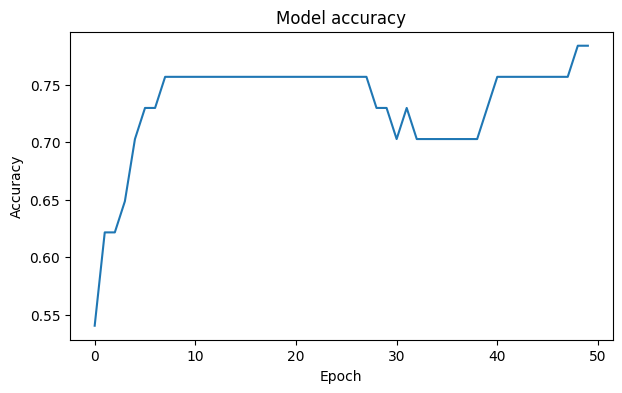

4/4 [==============================] - 0s 5ms/step - loss: 0.5596 - accuracy: 0.7965 - mae: 1.3648
Validation Accuracy: 0.7964601516723633
Validation MAE: 1.364796757698059


In [81]:
# Визуализация результатов
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Оценка на тестовых данных
test_loss, test_accuracy, mae = model.evaluate(test_loader)
print(f'Validation Accuracy: {test_accuracy}')
print(f'Validation MAE: {mae}')

### Sample prediction

In [82]:
# Получение предсказаний
predictions = tf.argmax(model.predict(X_test), axis=1).numpy()
print("Predictions:", predictions)

4/4 [==============================] - 0s 0s/step
Predictions: [2 0 0 2 2 2 2 0 2 0 0 2 0 2 2 2 1 2 2 0 1 2 2 2 2 2 0 2 0 1 0 0 2 1 2 0 1
 2 2 0 2 2 0 2 2 2 2 1 0 2 0 2 0 2 2 0 0 0 0 1 0 1 0 2 2 1 0 1 2 0 2 0 2 2
 1 2 2 2 0 0 0 1 2 2 2 2 2 0 0 1 0 1 1 2 2 2 2 2 2 0 0 0 2 2 1 0 0 0 2 2 2
 2 0]
